In [1]:
# Setting up cython
import ctypes
from numba.extending import get_cython_function_address
from simulators import levy
from tqdm import tqdm

# python setup_standard_levy.py build_ext --inplace

# Get a pointer to the C function levy.c
addr_levy= get_cython_function_address("levy", "levy_trial")
functype = ctypes.CFUNCTYPE(ctypes.c_double, ctypes.c_double, ctypes.c_double,                            
                            ctypes.c_double, ctypes.c_double, ctypes.c_double,
                            ctypes.c_double, ctypes.c_int)
levy_trial = functype(addr_levy)

In [2]:
import os, sys
sys.path.append("../")
sys.path.append("../DDM_LF_simstudy/simulators") 
# Get rid of annoying tf warning
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
np.set_printoptions(suppress=True)
from functools import partial
import sys, os, scipy
import seaborn as sns
import tensorflow as tf
import bayesflow as bf
import pickle, Cython
from tqdm import tqdm
from tensorflow.keras.backend import clear_session

############################################
from data_simulation import generate_training_data, simulate_data, simulate_data_fix_alpha
from train_networks import train_network_offline, train_network_online
from get_setup import get_setup
from configurations import get_params, configure_splitting
from fit_models import fit_models, fit_model_splitted_data
from create_plots import diagnostic_plots#, plot_bias, plot_recovery, compare_estimates

/home/divergence/anaconda3/envs/bfPower/lib/python3.10/site-packages/bayesflow/trainers.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
MODELS = ("standard_ddm","standard_levy")
MODELS_FULL = ("full_ddm", "full_levy")

In [4]:
# STANDARD MODELS
# simulate data for model fit
simulate_data(models=MODELS, num_sim=NUM_SIM)
NUM_TRAIN=100000
NUM_VAL=50
generate_training_data(models=MODELS, num_train=NUM_TRAIN, num_val=NUM_VAL)

In [ ]:
# offline training standard models
# loss function plot will be saved as png
train_network_offline(models=MODELS)

In [ ]:
# FULL MODELS
NUM_TRAIN=100000
NUM_VAL=50
generate_training_data(models=MODELS_FULL, num_train=NUM_TRAIN, num_val=NUM_VAL)

In [ ]:
# offline training full models
# loss function plot will be saved as png
train_network_offline(models=MODELS_FULL)

INFO:root:Performing 2 pilot runs with the diffusion_model model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 500, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:Could not determine shape of simulation batchable context. Type appears to be non-array: <class 'list'>,                                    so make sure your input configurator takes cares of that!
INFO:root:Loaded loss history from checkpoints/ddm/standard_ddm/history_100.pkl.
INFO:root:Networks loaded from checkpoints/ddm/standard_ddm/ckpt-100
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.
INFO:root:Performing 2 pilot runs with the lf_model model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2

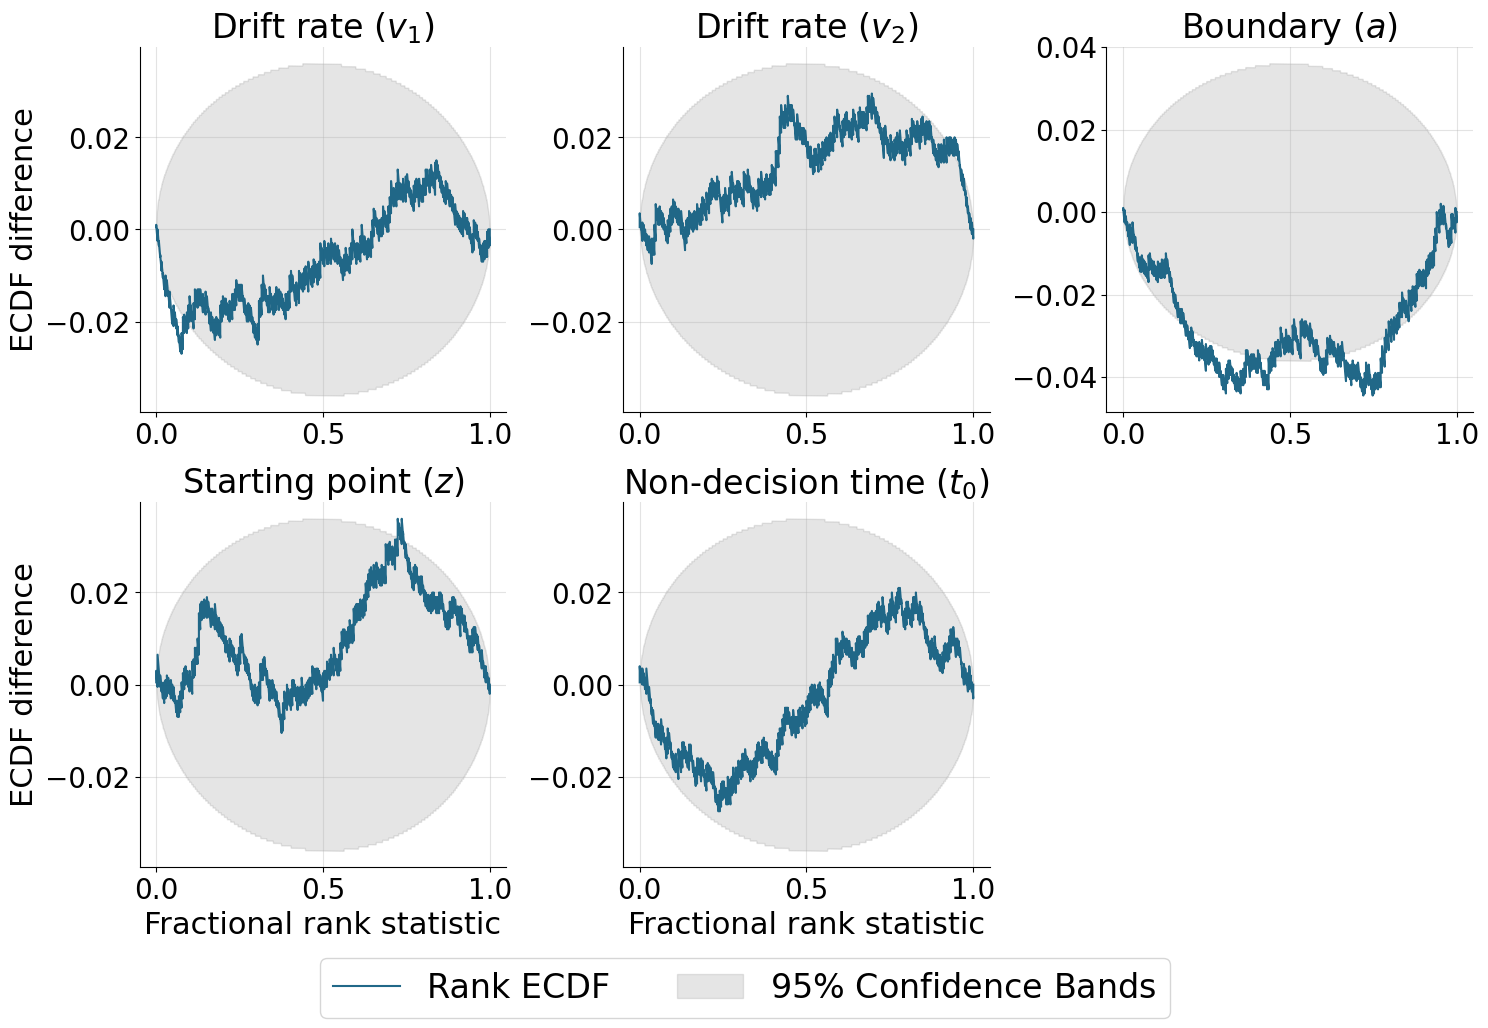

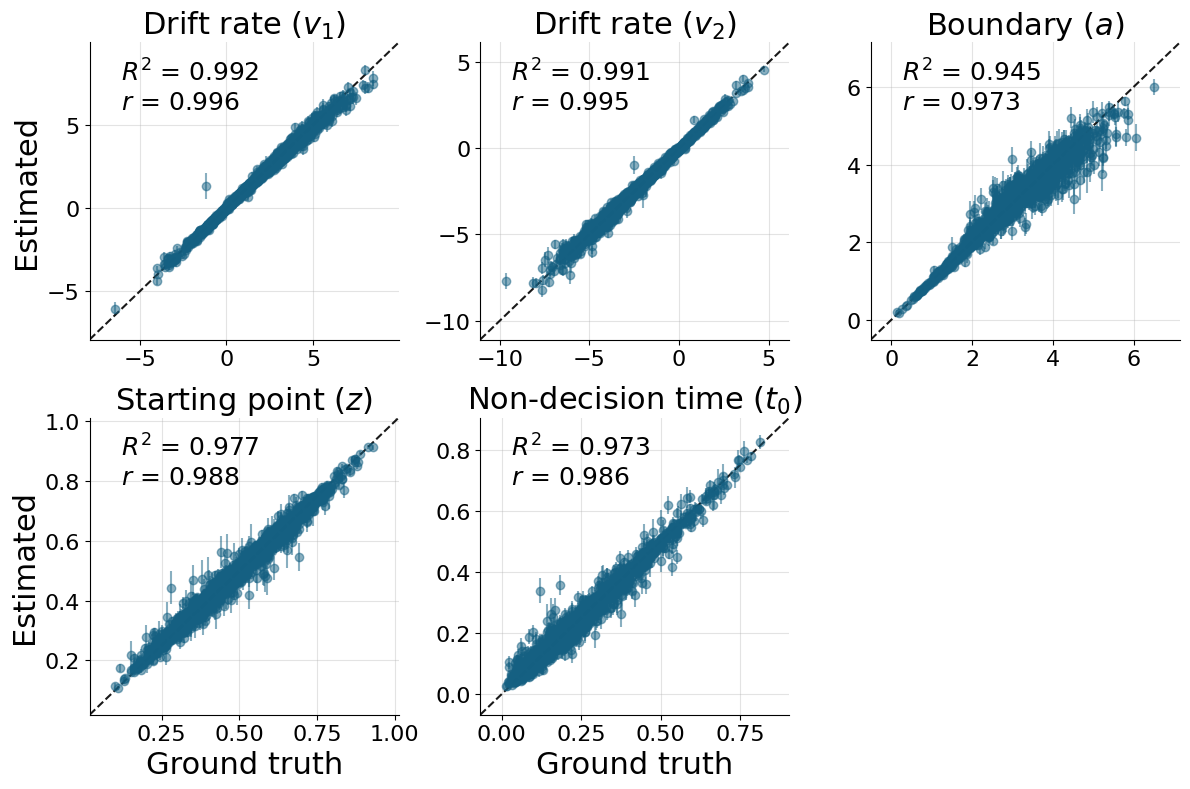

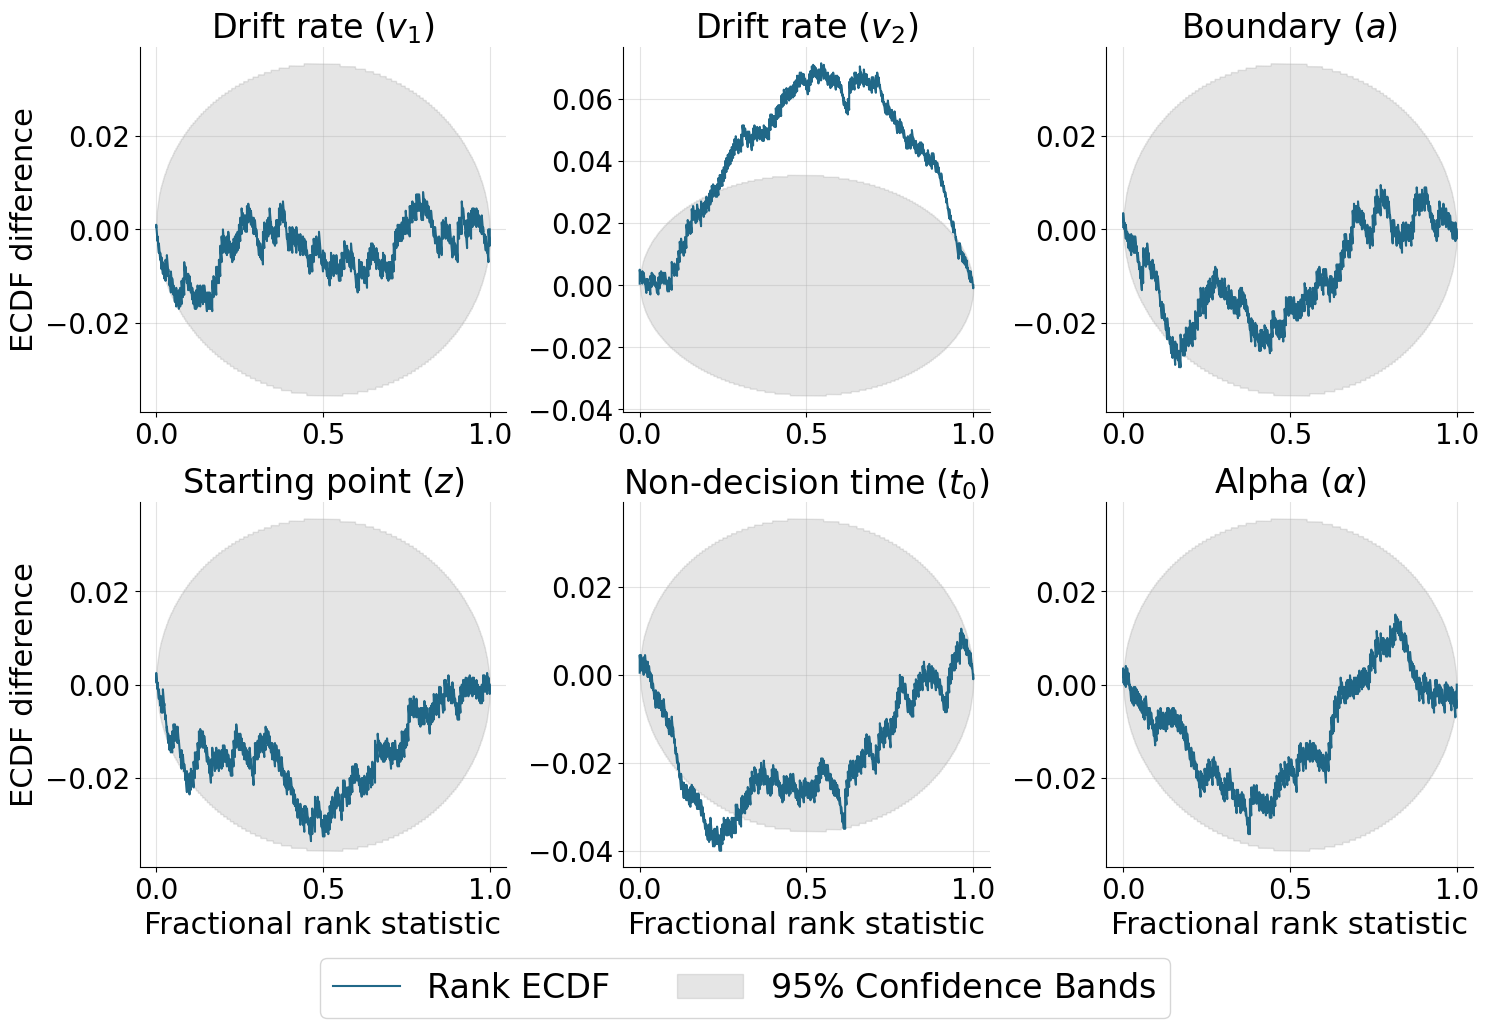

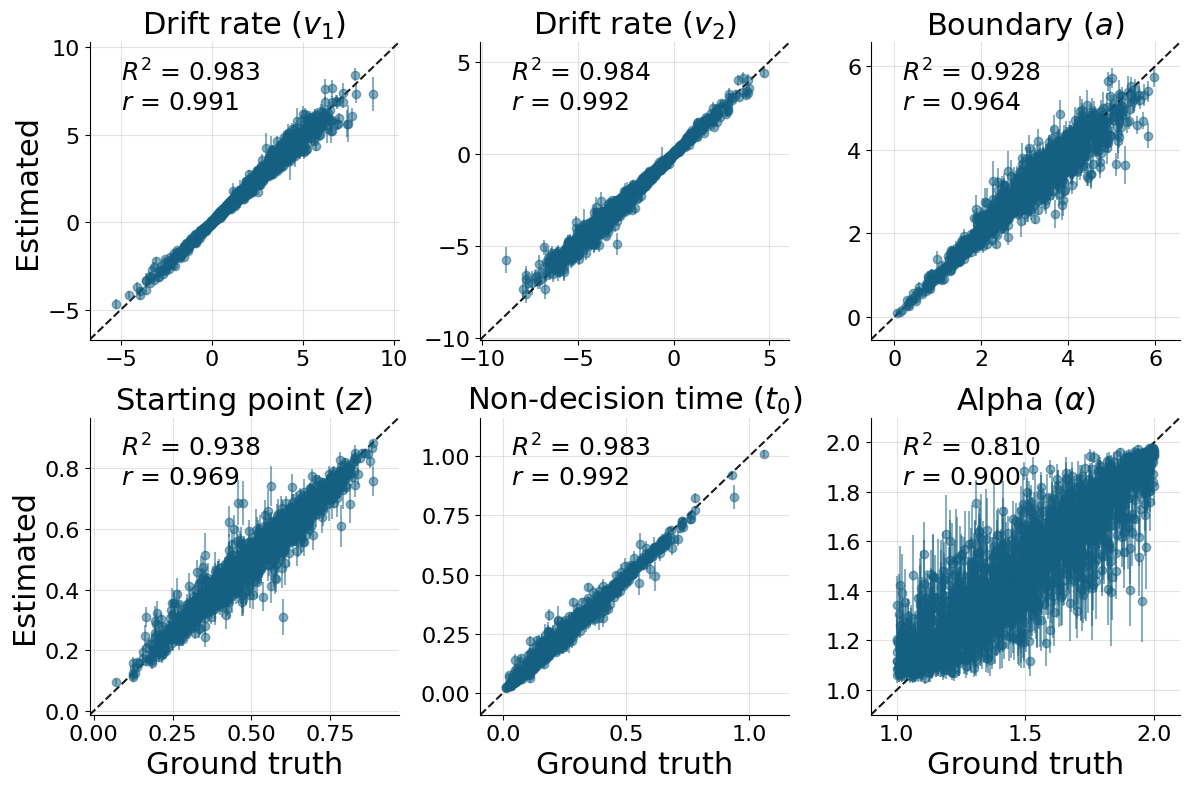

In [5]:
# Plot diagnostics for network models: Standard Models
diagnostic_plots(models=MODELS)

INFO:root:Performing 2 pilot runs with the diffusion_model model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 500, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:Could not determine shape of simulation batchable context. Type appears to be non-array: <class 'list'>,                                    so make sure your input configurator takes cares of that!
INFO:root:Loaded loss history from checkpoints/ddm/full_ddm/history_100.pkl.
INFO:root:Networks loaded from checkpoints/ddm/full_ddm/ckpt-100
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.
INFO:root:Performing 2 pilot runs with the lf_model model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 9)
INF

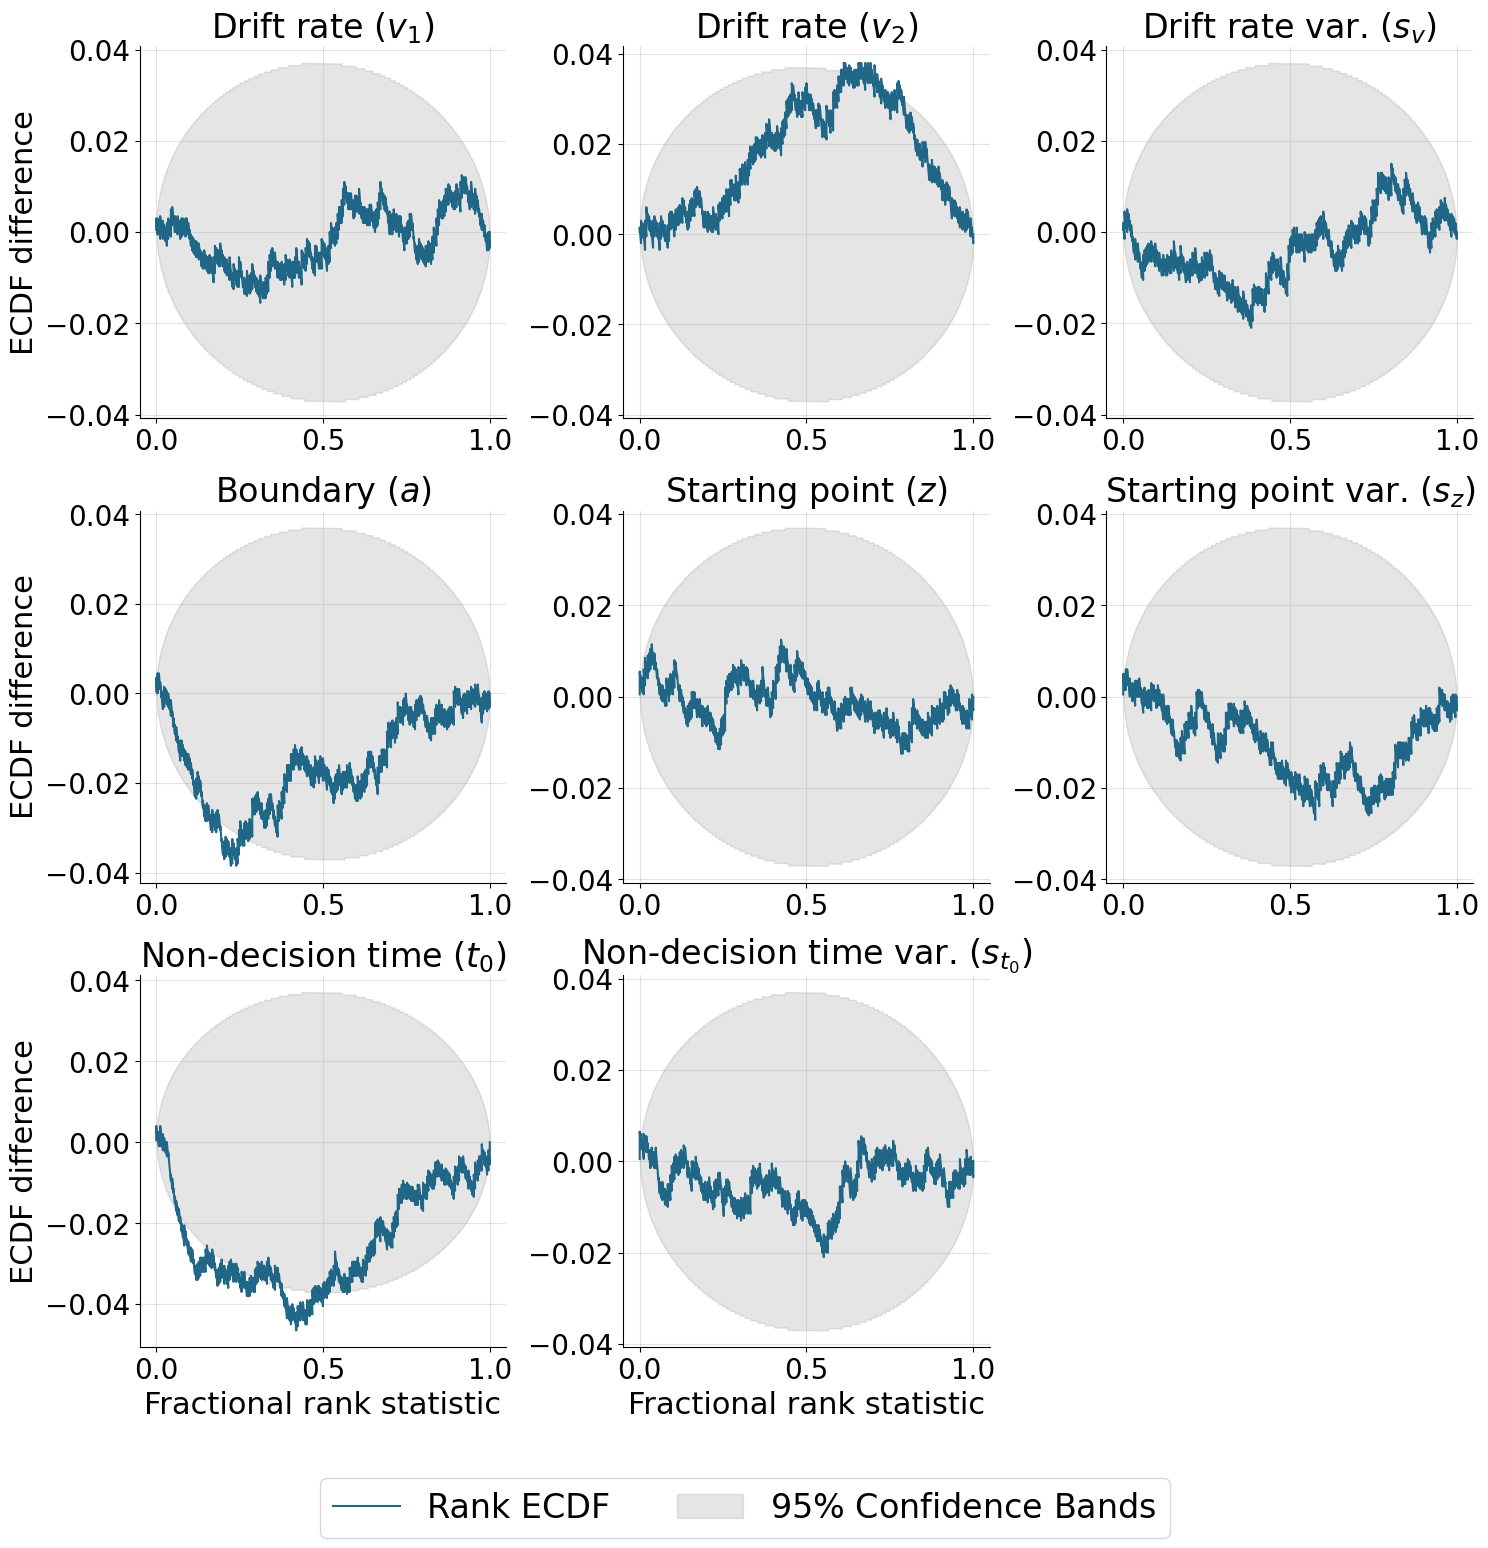

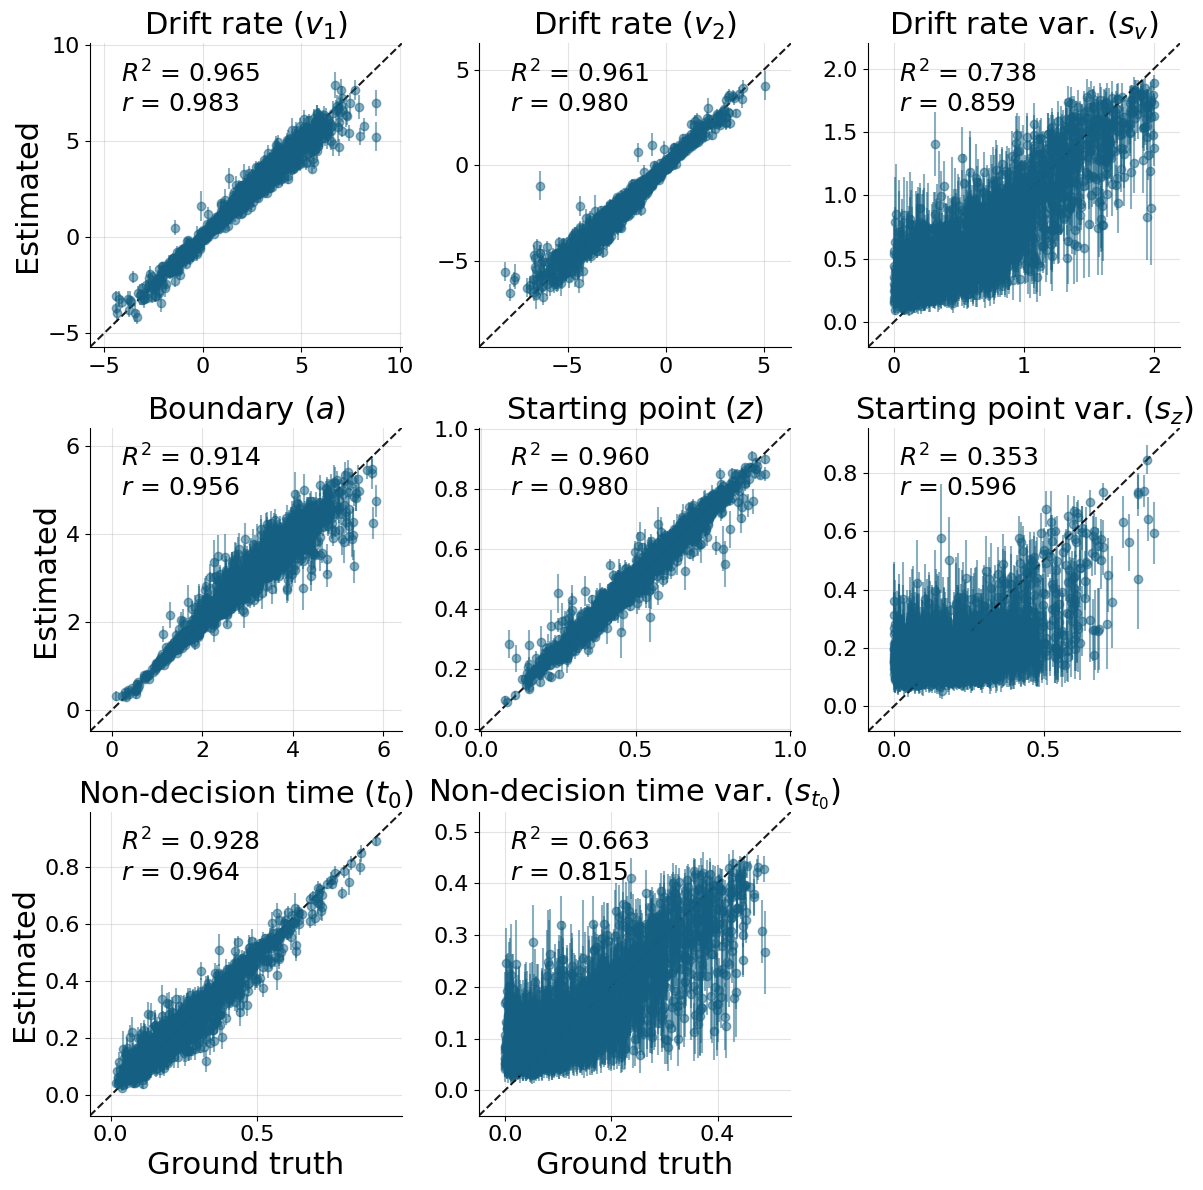

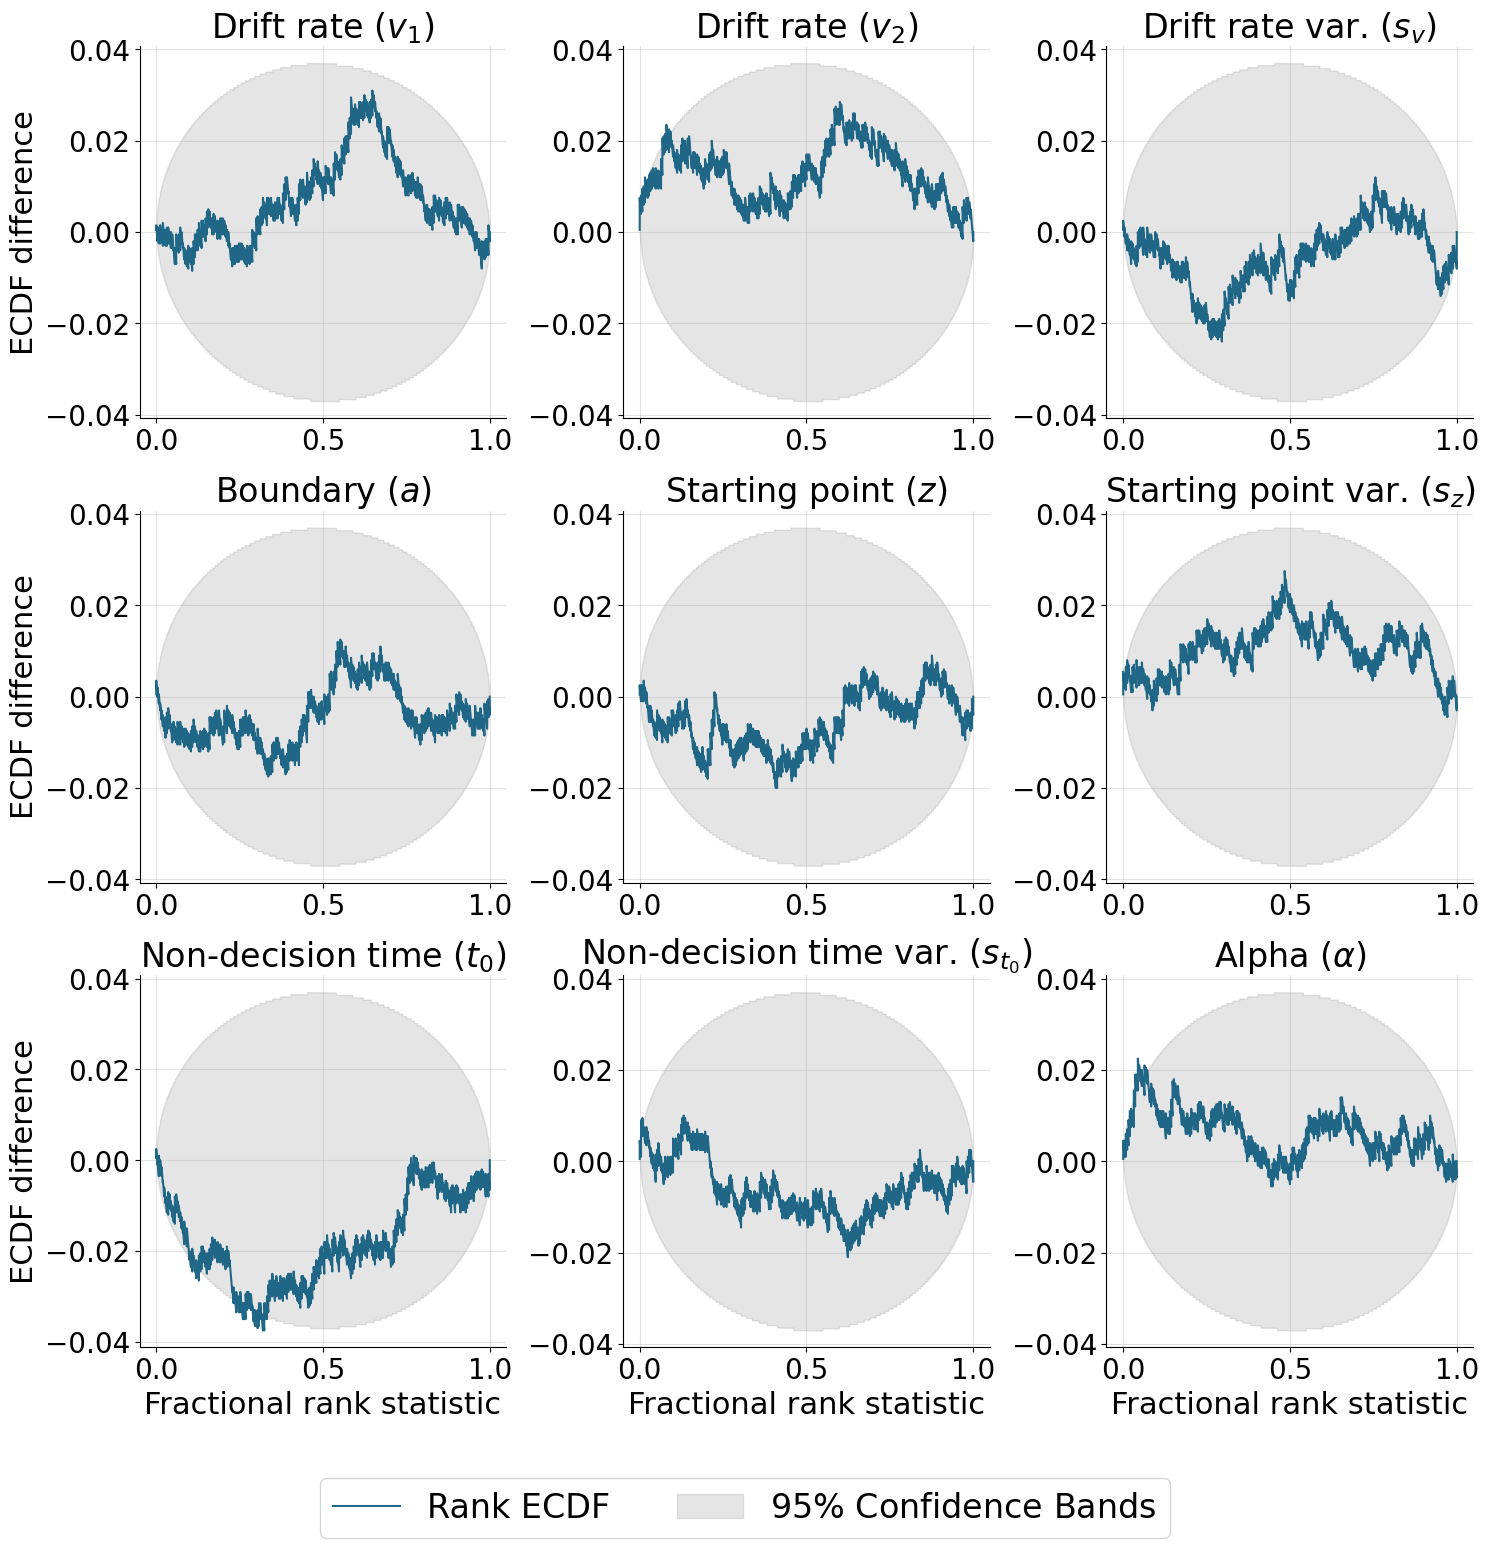

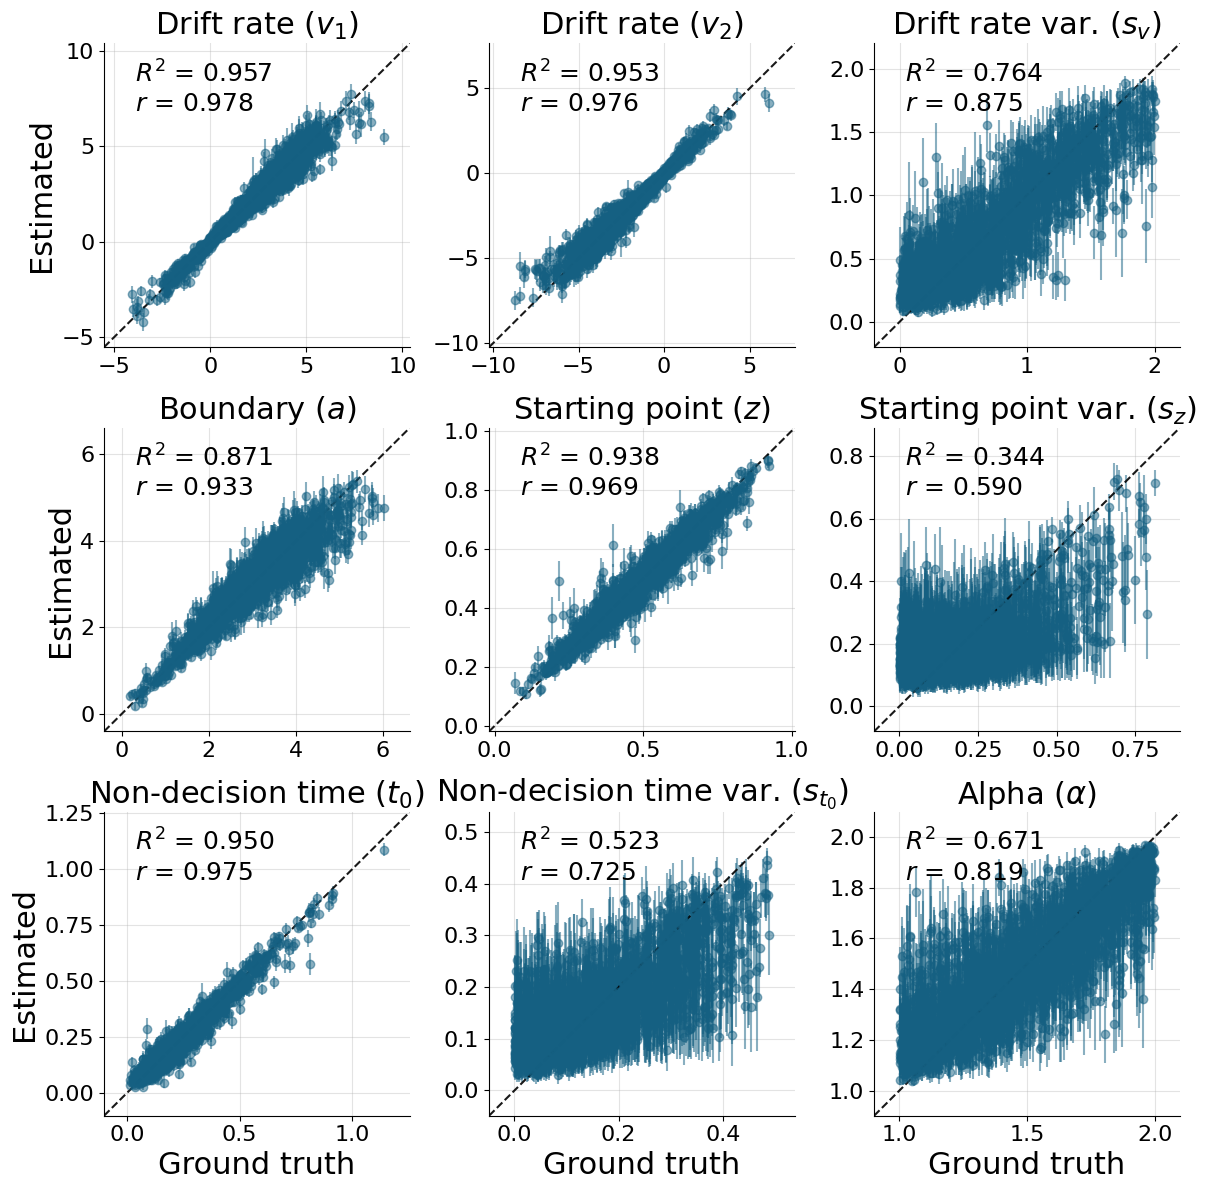

In [6]:
diagnostic_plots(MODELS_FULL)

In [ ]:
# Plot diagnostics for networks: Full Models
# diagnostic_plots(models=MODELS_FULL)

In [ ]:
# simulate data for model fit: Standard & Full models
NUM_SIM=1000
simulate_data(models=MODELS, num_sim=NUM_SIM)
simulate_data(models=MODELS_FULL, num_sim=NUM_SIM)

In [ ]:
# model fitting: Standard
fit_models(models=MODELS)

In [ ]:
# model fitting: Full
fit_models(models=MODELS_FULL)